In [110]:
import pandas as pd
from pykrx import stock

In [111]:
df_stock = stock.get_market_ohlcv_by_date('20100101','20191231','035420')
df_stock_close = df_stock[['종가']]
df_stock_close.head()

,종가
날짜,
2010-01-04,60583
2010-01-05,60583
2010-01-06,60269
2010-01-07,60426
2010-01-08,58386


In [112]:
df_stock_close.describe()

,종가
count,2466.000000
mean,116820.967964
std,39141.241250
min,50538.000000
25%,76906.000000
50%,125088.500000
75%,151615.000000
max,192272.000000


In [113]:
df_stock_close['변화량'] = df_stock_close['종가'] - df_stock_close['종가'].shift(1)
df_stock_close

/tmp/ipykernel_91730/368456586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['변화량'] = df_stock_close['종가'] - df_stock_close['종가'].shift(1)


,종가,변화량
날짜,,
2010-01-04,60583,NaN
2010-01-05,60583,0.0
2010-01-06,60269,-314.0
2010-01-07,60426,157.0
2010-01-08,58386,-2040.0
...,...,...
2019-12-23,184000,500.0
2019-12-24,182000,-2000.0
2019-12-26,180500,-1500.0


In [114]:
condition_up = df_stock_close['변화량'] >= 0
condition_down = df_stock_close['변화량'] < 0
condition_up, condition_down

(날짜
 2010-01-04    False
 2010-01-05     True
 2010-01-06    False
 2010-01-07     True
 2010-01-08    False
               ...  
 2019-12-23     True
 2019-12-24    False
 2019-12-26    False
 2019-12-27     True
 2019-12-30     True
 Name: 변화량, Length: 2466, dtype: bool,
 날짜
 2010-01-04    False
 2010-01-05    False
 2010-01-06     True
 2010-01-07    False
 2010-01-08     True
               ...  
 2019-12-23    False
 2019-12-24     True
 2019-12-26     True
 2019-12-27    False
 2019-12-30    False
 Name: 변화량, Length: 2466, dtype: bool)

In [115]:
df_stock_close.loc[condition_up, '상승폭'] = df_stock_close['변화량']
df_stock_close.loc[condition_down, '하락폭'] = - df_stock_close['변화량']
df_stock_close

/tmp/ipykernel_91730/4055830212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close.loc[condition_up, '상승폭'] = df_stock_close['변화량']
/tmp/ipykernel_91730/4055830212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close.loc[condition_down, '하락폭'] = - df_stock_close['변화량']


,종가,변화량,상승폭,하락폭
날짜,,,,
2010-01-04,60583,NaN,NaN,NaN
2010-01-05,60583,0.0,0.0,NaN
2010-01-06,60269,-314.0,NaN,314.0
2010-01-07,60426,157.0,157.0,NaN
2010-01-08,58386,-2040.0,NaN,2040.0
...,...,...,...,...
2019-12-23,184000,500.0,500.0,NaN
2019-12-24,182000,-2000.0,NaN,2000.0
2019-12-26,180500,-1500.0,NaN,1500.0


In [116]:
df_stock_close = df_stock_close.fillna(0)
df_stock_close

,종가,변화량,상승폭,하락폭
날짜,,,,
2010-01-04,60583,0.0,0.0,0.0
2010-01-05,60583,0.0,0.0,0.0
2010-01-06,60269,-314.0,0.0,314.0
2010-01-07,60426,157.0,157.0,0.0
2010-01-08,58386,-2040.0,0.0,2040.0
...,...,...,...,...
2019-12-23,184000,500.0,500.0,0.0
2019-12-24,182000,-2000.0,0.0,2000.0
2019-12-26,180500,-1500.0,0.0,1500.0


In [117]:
# 14일 기간에 대한 RSI

# 평균 상승폭
df_stock_close['AU'] = df_stock_close['상승폭'].rolling(window=14).mean()
# 평균 하락폭
df_stock_close['DU'] = df_stock_close['하락폭'].rolling(window=14).mean()

#슬라이싱 (14일 이전의 자료는 의미가 없음으로)
df_stock_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU
날짜,,,,,,
2010-01-21,59327,941.0,941.0,0.0,403.571429,493.285714
2010-01-22,57915,-1412.0,0.0,1412.0,403.571429,594.142857
2010-01-25,59013,1098.0,1098.0,0.0,482.000000,594.142857
2010-01-26,58699,-314.0,0.0,314.0,482.000000,594.142857
2010-01-27,58072,-627.0,0.0,627.0,470.785714,638.928571
2010-01-28,57130,-942.0,0.0,942.0,470.785714,560.500000
2010-01-29,54305,-2825.0,0.0,2825.0,470.785714,706.214286


In [118]:
# df_stock_close['RSI'] = 100 - ( 100 / (1 + (df_stock_close['AU'] / df_stock_close['DU'])))
df_stock_close['RSI'] = (df_stock_close['AU'] / (df_stock_close['AU'] + df_stock_close['DU'])) * 100
df_stock_close[13:].head()

,종가,변화량,상승폭,하락폭,AU,DU,RSI
날짜,,,,,,,
2010-01-21,59327,941.0,941.0,0.0,403.571429,493.285714,44.998407
2010-01-22,57915,-1412.0,0.0,1412.0,403.571429,594.142857,40.449599
2010-01-25,59013,1098.0,1098.0,0.0,482.000000,594.142857,44.789592
2010-01-26,58699,-314.0,0.0,314.0,482.000000,594.142857,44.789592
2010-01-27,58072,-627.0,0.0,627.0,470.785714,638.928571,42.424047


In [119]:
# df_stock_close['매도'] = df_stock_close['RSI'] > 70
# df_stock_close['매수'] = df_stock_close['RSI'] < 30
# df_stock_close

####   + 매도 : RSI > 70, 매수 : RSI < 30, 나머진 보유
- RSI 전략 적용과 단순 보유 수익 차이

-어떻게 풀어야 할지 몰라 상훈님 코드 참조하다 중단

In [120]:
def cal(series):
    result = []
    current_state = False # 초기 상태는 False 왜?
    
    for value in series:
        if current_state : # TRUE 상태일 때
            if value >= 70: # 70이상이면 False로 전환
                current_state = False
    
        else: # False 상태일 때
            if value <= 30: # 30 이하면 True로 전환
                current_state = True
    
    result.append(current_state)
    
    return result

In [ ]:
# 30 이하에 사서 70 이상에 판다 다시 30 이하에 사서 70 이상에 판다
# false 30이하 구매 true 70 이상에 false 
# true중 최초 종가를 true중 마지막 종가에서 빼면 수익률 과 기간  
df_stock_close['T or F'] = calc(df_stock_close) 

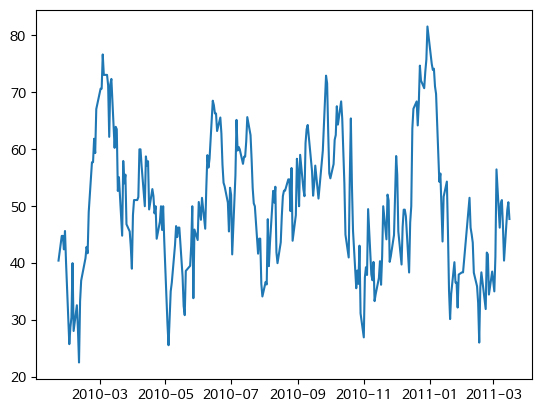

In [121]:
import matplotlib.pyplot as plt

plt.figure((10.6))
plt.plot(df_stock_close['RSI'][14:300])
plt.show()